In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [347]:
data=pd.read_csv("AskMiddleEast 2022 Census.csv")

This guy filled the survey 20000 times, dropped all his entries.

In [348]:
data.drop((data.loc[data["Country of origin"]=="100% chadraqi"]).index,inplace=True)

I made a huge mistake giving the target audience the option to write, questions that required writing were less likely to be answered and needed cleaning.

strings with emojis, spaces, different cases and transliteration

In [349]:
countries=["The country you love the most","The country you hate the most","Country of origin"]

for country in countries:
    data=data.replace({f"{country}":".*(audi|KSA|سلمان).*"},"Saudi Arabia",regex=True)
    data=data.replace({f"{country}":".*(Is|rael|isr).*"},"Israel",regex=True)
    data=data.replace({f"{country}":".*Eg.*"},"Egypt",regex=True)
    data=data.replace({f"{country}":[".*(tate|US|Merica|America).*"]},"USA",regex=True)
    data=data.replace({f"{country}":[".*(les|Plastne|Palestine|tine).*"]},"Palestine",regex=True)
    data=data.replace({f"{country}":[".*(aki).*"]},"Pakistan",regex=True)
    data=data.replace({f"{country}":[".*(occo).*"]},"Morocco",regex=True)
    data=data.replace({f"{country}":[".*(urk|IYE|iye|İYE).*"]},"Turkey",regex=True)
    data=data.replace({f"{country}":[".*(Emi|UAE|Uae).*"]},"UAE",regex=True)
    data=data.replace({f"{country}":[".*ord.*"]},"Jordan",regex=True)
    data=data.replace({f"{country}":[".*(United Kingdom|Eng|Britania).*"]},"UK",regex=True)
    data=data.replace({f"{country}":[".*Leb.*"]},"Lebanon",regex=True)
    data=data.replace({f"{country}":[".*Syr.*"]},"Syria",regex=True)
    data=data.replace({f"{country}":[".*Ind.*"]},"India",regex=True)
    data=data.replace({f"{country}":[".*Tun.*"]},"Tunisia",regex=True)
    data=data.replace({f"{country}":[".*Afgh.*"]},"Afghanistan",regex=True)
    data=data.replace({f"{country}":[".*Lib.*"]},"Libya",regex=True)
    data=data.replace({f"{country}":[".*(one|Nil|N/a).*"]},"Libya",regex=True)
    data=data.replace({f"{country}":[".*nce.*"]},"France",regex=True)
    data=data.replace({f"{country}":[".*CCP.*"]},"China",regex=True)
    data=data.replace({f"{country}":[".*Iran.*"]},"Iran",regex=True)
    data=data.replace({f"{country}":[".*Kuwait.*"]},"Kuwait",regex=True)
    data=data.replace({f"{country}":[".*(apan|AAAAA).*"]},"Japan",regex=True)
    data=data.replace({f"{country}":[".*(raq).*"]},"Iraq",regex=True)
    data=data.replace({f"{country}":[".*(geria).*"]},"Algeria",regex=True)
    data=data.replace({f"{country}":[".*(ussia).*"]},"Russia",regex=True)
    data=data.replace({f"{country}":[".*(reece).*"]},"Greece",regex=True)
    data=data.replace({f"{country}":[".*(Nether).*"]},"Netherlands",regex=True)

    
    

I made a mistake when making the survey and made an option "Studend" instead of "Student"

In [350]:
data.loc[data["Professional status"]=="Studend","Professional status"]="Student"

In [351]:
# pd.options.display.width=0
# droping timestamp would have helped me using dropna(how="all") to drop the below records 
# one of them have a single value and I thought I might use the time column.
data[124:129]

,Timestamp,Country of origin,Gender,How old are you,Marital status,Professional status,Are you a refugee,What is your highest level of education,Major,choose a pet,...,How many languages can you speak,The country you love the most,The country you hate the most,Religion,Saudi Arabia's oil belongs to,I Support a,I stand with,I Stand With,Are you satisfied with the current status of your country,Fuck israel?
124,2022/07/27 12:18:40 pm GMT+3,Pakistan,Male,17.0,Single,Student,No,High school,-,Dog,...,2,Pakistan,India,Islam,The Muslims around the world,One State Solution - Just Palestine,Neither,Palestine,No,Absolutely
126,2022/07/27 2:28:42 pm GMT+3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2022/07/27 2:39:57 pm GMT+3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2022/07/27 2:40:32 pm GMT+3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2022/07/27 2:44:30 pm GMT+3,tunisia,Male,32.0,Single,Employed,No,High school,NaN,Cat,...,3,NaN,NaN,Islam,Saudi Arabia,Two State Solution,Ukraine,Palestine,No,Of course


In [352]:
# these are null with one value
data.drop((data.loc[126:128]).index,inplace=True)
# this one is a troll; a 5 year old, 3 meters, from tonga, widowed and studies Thuganomics
data.drop([20],axis=0,inplace=True)
# this one have all null except for one column
data.drop([7],axis=0,inplace=True)
# data=data.reset_index(drop=True)

In [353]:
data=data.reset_index(drop=True)

In [354]:
eye="Eye color"
# black eyes are dark brown
data=data.replace({f"{eye}":".*(lack|Brown).*"},"Brown",regex=True)
data=data.replace({f"{eye}":".*(ed|Pur).*"},"Other",regex=True)

In [355]:
data["Eye color"].value_counts()

Brown    101
Hazel     13
Green      7
Gray       4
Blue       4
Other      2
Name: Eye color, dtype: int64

In [356]:
data["How old are you"]

0       23.0
1       17.0
2       21.0
3       18.0
4      120.0
       ...  
127     21.0
128     15.0
129     18.0
130     23.0
131     21.0
Name: How old are you, Length: 132, dtype: float64

<AxesSubplot:>

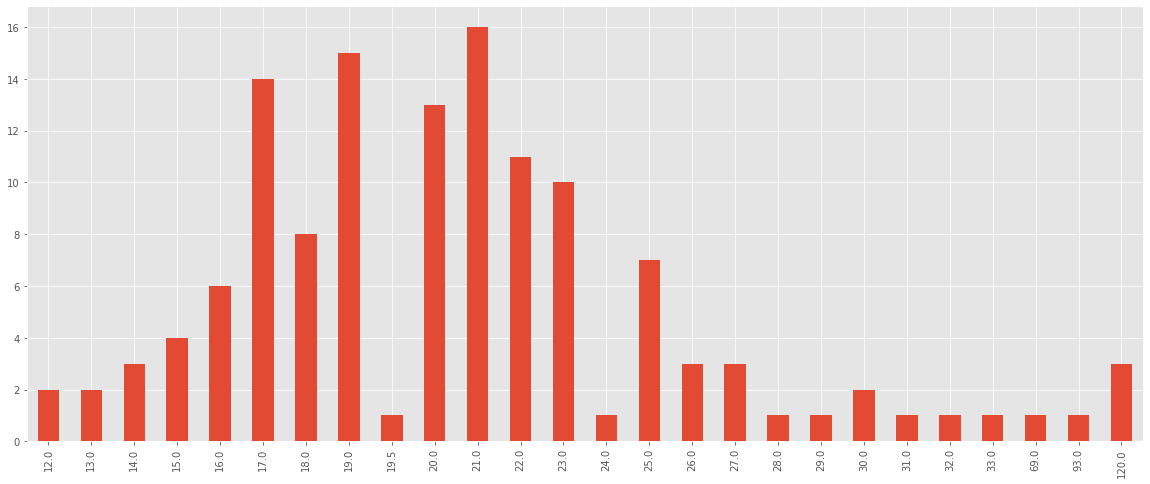

In [357]:
data["How old are you"].value_counts().sort_index().plot.bar(figsize=(20,8))

<AxesSubplot:>

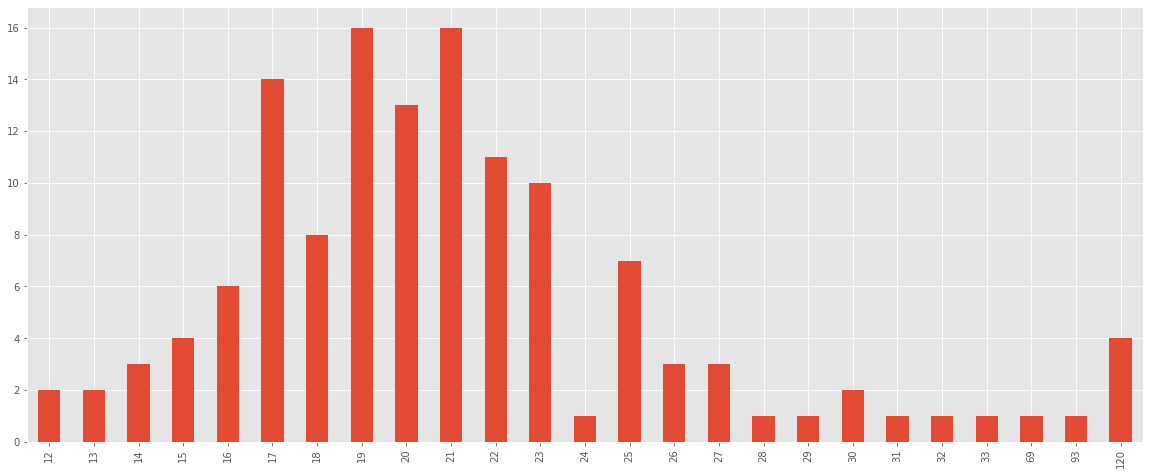

In [358]:
data["How old are you"].fillna(120).astype(int).value_counts().sort_index().plot.bar(figsize=(20,8))

<AxesSubplot:>

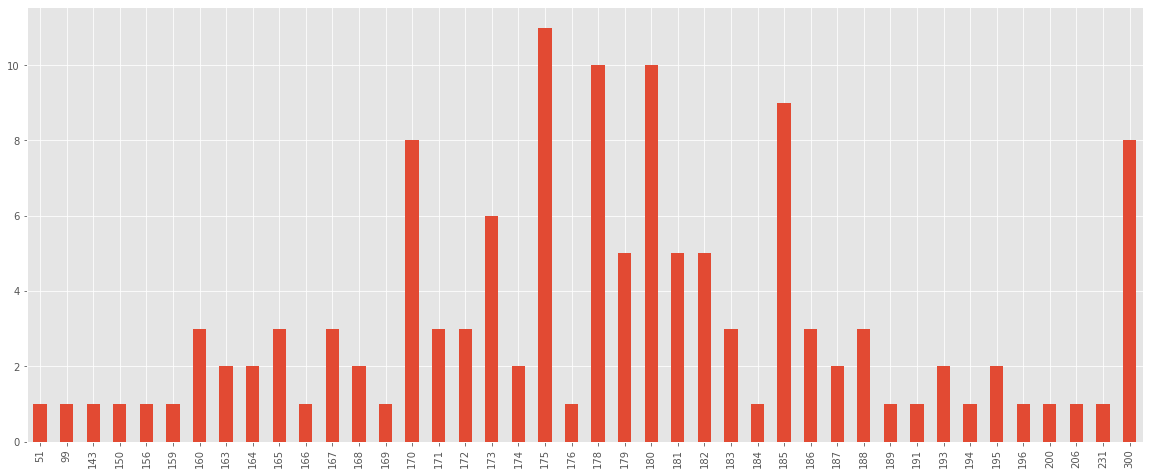

In [359]:
data["Height in cm"].fillna(300).astype(int).value_counts().sort_index().plot.bar(figsize=(20,8))

In [360]:
data["Height in cm"].mean()

178.76125984251968

<AxesSubplot:ylabel='Fuck israel?'>

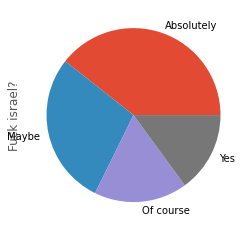

In [361]:
data["Fuck israel?"].value_counts().plot.pie()

<AxesSubplot:ylabel='I stand with '>

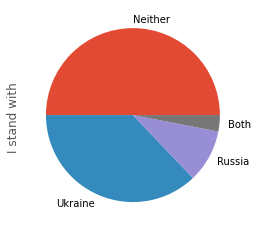

In [362]:
data["I stand with "].value_counts().plot.pie()

<AxesSubplot:ylabel='I Stand With'>

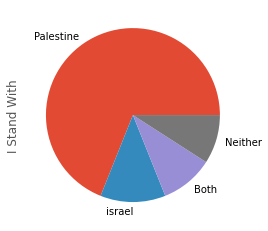

In [363]:
data["I Stand With"].value_counts().plot.pie()

<AxesSubplot:ylabel='I Support a'>

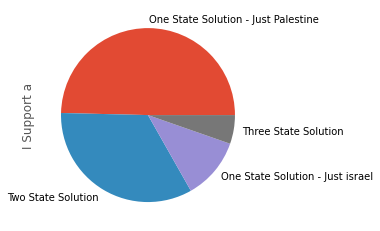

In [364]:
data["I Support a"].value_counts().plot.pie()

In [365]:
data["Country of origin"].value_counts().sort_index()

Afghanistan      2
Algeria          6
Australia        1
Azerbaijan       1
Bangladesh       1
Denmark          1
Egypt            7
France           1
India            3
Iran             2
Iraq             5
Israel          11
Italy            1
Jordan           3
Kuwait           2
Lebanon          6
Libya            2
Malta            1
Morocco          5
Pakistan         8
Palestine        5
Philippines      1
Qatar            1
Romania          1
Russia           1
Saudi Arabia    11
Singapore        1
Slovenia         1
Somalia          1
Sudan            1
Syria            4
Tunisia          3
Turkey           8
UAE              2
UK               2
USA              4
Yemen            3
Your mom         1
south korea      1
taiwan           1
tunisia          1
Name: Country of origin, dtype: int64

In [368]:
data

,Timestamp,Country of origin,Gender,How old are you,Marital status,Professional status,Are you a refugee,What is your highest level of education,Major,choose a pet,...,How many languages can you speak,The country you love the most,The country you hate the most,Religion,Saudi Arabia's oil belongs to,I Support a,I stand with,I Stand With,Are you satisfied with the current status of your country,Fuck israel?
0,2022/07/26 2:58:21 pm GMT+3,Morocco,Male,23.0,Single,Student,No,Master's,Engineering,Dog,...,3,Algeria,Israel,Islam,USA,One State Solution - Just israel,Neither,Palestine,It's fine,Of course
1,2022/07/26 2:58:42 pm GMT+3,Israel,Male,17.0,Single,Student,No,Bachelor's,Computer science,Dog,...,3,Israel,France,Judaism,Saudi Arabia,One State Solution - Just israel,Ukraine,israel,Yes,NaN
2,2022/07/26 2:59:08 pm GMT+3,Lebanon,Female,21.0,Single,Unemployed,No,Bachelor's,NaN,Cat,...,3,Cyrpus,Iran,Atheism / Agnosticism,Saudi Arabia,Three State Solution,Neither,Palestine,No,Maybe
3,2022/07/26 2:59:27 pm GMT+3,Egypt,Male,18.0,Single,Student,No,High school,Computer Eng,Dog,...,2,Egypt,Israel,Islam,USA,One State Solution - Just Palestine,Neither,Palestine,No,Absolutely
4,2022/07/26 3:00:33 pm GMT+3,Saudi Arabia,Male,120.0,Single,Student,No,High school,Wtf is major,Cat,...,2,UAE,Israel,Islam,Saudi Arabia,Two State Solution,Neither,Neither,Yes,Absolutely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2022/07/29 10:03:22 pm GMT+3,India,Male,21.0,Single,Student,No,Bachelor's,Business,Cat,...,More than five,NaN,India,Islam,The Muslim Arabs,One State Solution - Just Palestine,Neither,Palestine,No,Absolutely
128,2022/07/29 10:33:12 pm GMT+3,Iraq,Male,15.0,Single,Student,No,High school,NaN,Dog,...,3,Germany,Saudi Arabia,Islam,Saudi Arabia,One State Solution - Just Palestine,Ukraine,Palestine,No,Yes
129,2022/07/30 1:02:11 am GMT+3,Saudi Arabia,Male,18.0,Single,Student,No,High school,idk wtf i want to be,Dog,...,2,Saudi Arabia,Israel,Islam,Saudi Arabia,One State Solution - Just Palestine,Neither,Palestine,It's fine,Of course
130,2022/07/30 1:33:46 am GMT+3,USA,Male,23.0,Single,Student,No,Diploma,Design,Cat,...,1,Israel,Algeria,Judaism,Saudi Arabia,One State Solution - Just israel,Ukraine,Both,No,Maybe


In [367]:
data.to_csv("askdata.csv")